# Data Exploration on _Why we Refactor?_ 

Reference:
Danilo Silva, Nikolaos Tsantalis, and Marco Tulio Valente, "Why We Refactor? Confessions of GitHub Contributors", 24th ACM SIGSOFT International Symposium on the Foundations of Software Engineering (FSE'2016), Seattle, WA, USA, November 13-18, 2016

In [272]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/jerelyn/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [273]:
data_dir = "data/"

In [274]:
df_commits = pd.read_json(data_dir + "commitMap.json", orient="index")
df_commits.head()

,author,emailBody,hasResponse,id,inferredMotivation,message,motivations,others,refactorings,repository,sha1,time
1100435,Christian Melchior,"\r\n<p>Dear Christian Melchior,</p>\r\n\r\n<p>...",1,1100435,0,Updating version number now always require a m...,[{'label': 'EM: Introduce alternative method s...,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/realm/realm-java.git,6cf596df183b3c3a38ed5dd9bb3b0100c6548ebb,6/8/15 7:26 AM
1100842,Ekaterina Tuzova,"\r\n<p>Dear Ekaterina Tuzova,</p>\r\n\r\n<p>\r...",1,1100842,0,Stepic now paginates it's output\n,"[{'label': 'EM: Extract reusable method', 'sta...","[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,7ed3f273ab0caf0337c22f0b721d51829bb0c877,6/8/15 10:29 AM
1101296,Teryk Bellahsene,"\r\n<p>Dear Teryk Bellahsene,</p>\r\n\r\n<p>\r...",1,1101296,0,refactoring - move custom measures related cla...,"[{'label': 'RP: Improve package name', 'status...","[{'label': 'ide: IntelliJ IDEA', 'status': 'rm...","[{'type': 'Rename Package', 'description': '<b...",https://github.com/SonarSource/sonarqube.git,4a2247c24efee48de53ca07302b6810ab7205621,6/8/15 11:12 AM
1103199,Igor Spasi?,"\r\n<p>Dear Igor Spasi?,</p>\r\n\r\n<p>\r\nI a...",1,1103199,0,Fixed encoding with multiparts (thanx Nick!)\n,"[{'label': 'EM: Extract reusable method', 'sta...","[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/oblac/jodd.git,722ef9156896248ef3fbe83adde0f6ff8f46856a,6/8/15 6:08 AM
1103658,Michael Jumper,"\r\n<p>Dear Michael Jumper,</p>\r\n\r\n<p>\r\n...",1,1103658,0,GUAC-1176: Implement password reset logic with...,[{'label': 'MA: Move attribute to appropriate ...,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Move Attribute', 'description': '<b...",https://github.com/glyptodon/guacamole-client.git,ebb483320d971ff4d9e947309668f5da1fcd3d23,6/8/15 5:46 AM


In [275]:
# Repeat commit messages with multiple motivation labels
m = df_commits.apply(lambda x: pd.Series(x['motivations']),axis=1).stack().reset_index(level=1, drop=True)
m.name = 'motivation'

# Joining to the old df
df_commits = df_commits.drop('motivations', axis=1).join(m)
df_commits.head()

# Removing unnecessary substrings
df_commits["motivation"] = df_commits["motivation"].apply(lambda x: str(x).strip("{'label':").strip("'}").strip())

# Removing single valued list
df_commits = df_commits[df_commits["motivation"].apply(lambda x: len(x.split(",")[0].split(":")) == 2 )]

# Splittgn label and description
df_commits["motivation_label"] = df_commits["motivation"].apply(lambda x: x.split(",")[0].split(":")[0].strip("'"))
df_commits["motivation_desc"] = df_commits["motivation"].apply(lambda x: x.split(",")[0].split(":")[1].strip("'"))

df_commits.head()

,author,emailBody,hasResponse,id,inferredMotivation,message,others,refactorings,repository,sha1,time,motivation,motivation_label,motivation_desc
1100435,Christian Melchior,"\r\n<p>Dear Christian Melchior,</p>\r\n\r\n<p>...",1,1100435,0,Updating version number now always require a m...,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/realm/realm-java.git,6cf596df183b3c3a38ed5dd9bb3b0100c6548ebb,6/8/15 7:26 AM,"'EM: Introduce alternative method signature', ...",EM,Introduce alternative method signature
1100842,Ekaterina Tuzova,"\r\n<p>Dear Ekaterina Tuzova,</p>\r\n\r\n<p>\r...",1,1100842,0,Stepic now paginates it's output\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,7ed3f273ab0caf0337c22f0b721d51829bb0c877,6/8/15 10:29 AM,"'EM: Extract reusable method', 'status': 'match1",EM,Extract reusable method
1100842,Ekaterina Tuzova,"\r\n<p>Dear Ekaterina Tuzova,</p>\r\n\r\n<p>\r...",1,1100842,0,Stepic now paginates it's output\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,7ed3f273ab0caf0337c22f0b721d51829bb0c877,6/8/15 10:29 AM,"'EM: Facilitate extension', 'status': 'match1",EM,Facilitate extension
1101296,Teryk Bellahsene,"\r\n<p>Dear Teryk Bellahsene,</p>\r\n\r\n<p>\r...",1,1101296,0,refactoring - move custom measures related cla...,"[{'label': 'ide: IntelliJ IDEA', 'status': 'rm...","[{'type': 'Rename Package', 'description': '<b...",https://github.com/SonarSource/sonarqube.git,4a2247c24efee48de53ca07302b6810ab7205621,6/8/15 11:12 AM,"'RP: Improve package name', 'status': 'match2",RP,Improve package name
1103199,Igor Spasi?,"\r\n<p>Dear Igor Spasi?,</p>\r\n\r\n<p>\r\nI a...",1,1103199,0,Fixed encoding with multiparts (thanx Nick!)\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/oblac/jodd.git,722ef9156896248ef3fbe83adde0f6ff8f46856a,6/8/15 6:08 AM,"'EM: Extract reusable method', 'status': 'match2",EM,Extract reusable method


In [276]:
df_commits["mo"]

,author,emailBody,hasResponse,id,inferredMotivation,message,others,refactorings,repository,sha1,time,motivation,motivation_label,motivation_desc
1100435,Christian Melchior,"\r\n<p>Dear Christian Melchior,</p>\r\n\r\n<p>...",1,1100435,0,Updating version number now always require a m...,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/realm/realm-java.git,6cf596df183b3c3a38ed5dd9bb3b0100c6548ebb,6/8/15 7:26 AM,"'EM: Introduce alternative method signature', ...",EM,Introduce alternative method signature
1100842,Ekaterina Tuzova,"\r\n<p>Dear Ekaterina Tuzova,</p>\r\n\r\n<p>\r...",1,1100842,0,Stepic now paginates it's output\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,7ed3f273ab0caf0337c22f0b721d51829bb0c877,6/8/15 10:29 AM,"'EM: Extract reusable method', 'status': 'match1",EM,Extract reusable method
1100842,Ekaterina Tuzova,"\r\n<p>Dear Ekaterina Tuzova,</p>\r\n\r\n<p>\r...",1,1100842,0,Stepic now paginates it's output\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,7ed3f273ab0caf0337c22f0b721d51829bb0c877,6/8/15 10:29 AM,"'EM: Facilitate extension', 'status': 'match1",EM,Facilitate extension
1101296,Teryk Bellahsene,"\r\n<p>Dear Teryk Bellahsene,</p>\r\n\r\n<p>\r...",1,1101296,0,refactoring - move custom measures related cla...,"[{'label': 'ide: IntelliJ IDEA', 'status': 'rm...","[{'type': 'Rename Package', 'description': '<b...",https://github.com/SonarSource/sonarqube.git,4a2247c24efee48de53ca07302b6810ab7205621,6/8/15 11:12 AM,"'RP: Improve package name', 'status': 'match2",RP,Improve package name
1103199,Igor Spasi?,"\r\n<p>Dear Igor Spasi?,</p>\r\n\r\n<p>\r\nI a...",1,1103199,0,Fixed encoding with multiparts (thanx Nick!)\n,"[{'label': 'Automated', 'status': 'rm'}, {'lab...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/oblac/jodd.git,722ef9156896248ef3fbe83adde0f6ff8f46856a,6/8/15 6:08 AM,"'EM: Extract reusable method', 'status': 'match2",EM,Extract reusable method
1103658,Michael Jumper,"\r\n<p>Dear Michael Jumper,</p>\r\n\r\n<p>\r\n...",1,1103658,0,GUAC-1176: Implement password reset logic with...,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Move Attribute', 'description': '<b...",https://github.com/glyptodon/guacamole-client.git,ebb483320d971ff4d9e947309668f5da1fcd3d23,6/8/15 5:46 AM,"'MA: Move attribute to appropriate class', 'st...",MA,Move attribute to appropriate class
1104589,pron,"\r\n<p>Dear pron,</p>\r\n\r\n<p>\r\nI am a Ph....",1,1104589,0,add ChannelProcessor (and fixes)\n,"[{'label': 'Manual', 'status': 'rm'}, {'label'...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/puniverse/quasar.git,c22d40fab8dfe4c5cad9ba582caf0855ff64b324,6/8/15 8:49 AM,"'EM: Enable overriding', 'status': 'match2",EM,Enable overriding
1105586,Marvin Arnold,"\r\n<p>Dear Marvin Arnold,</p>\r\n\r\n<p>\r\nI...",0,1105586,1,Refactored AIMSICDDbAdapter::DbHelper#onCreate...,"[{'label': 'Unknown', 'status': 'rm'}, {'label...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/SecUpwN/Android-IMSI-Catche...,e235f884f2e0bc258da77b9c80492ad33386fa86,6/7/15 9:44 PM,"'EM: Decompose method to improve readability',...",EM,Decompose method to improve readability
1105950,Bas Leijdekkers,"\r\n<p>Dear Bas Leijdekkers,</p>\r\n\r\n<p>\r\...",1,1105950,0,IDEA-141007 (Java | Java language level migrat...,"[{'label': 'ide: IntelliJ IDEA', 'status': 'rm...","[{'type': 'Extract Method', 'description': '<b...",https://github.com/JetBrains/intellij-communit...,cc0eaf7faa408a04b68e2b5820f3ebcc75420b5b,6/8/15 11:39 AM,"'EM: Extract reusable method', 'status': 'match2",EM,Extract reusable method
1106044,Chris Kittrell,"\r\n<p>Dear Chris Kittrell,</p>\r\n\r\n<p>\r\n...",0,1106044,1,Broadleaf

In [261]:
frequent_four = df_commits["motivation_label"].value_counts().index[:4]
frequent_four

Index(['EM', 'MC', 'MA', 'MM'], dtype='object')

## 'Sentiment' Analysis approach

In [262]:
data = df_commits[["message", "motivation_label"]]

In [263]:
train, test = train_test_split(data, test_size=0.2)

In [264]:
train_em = train[train["motivation_label"] == "EM"]
train_em = train_em["message"]
train_mc = train[train["motivation_label"] == "MC"]
train_mc = train_mc["message"]

In [212]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if '\n' not in word
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

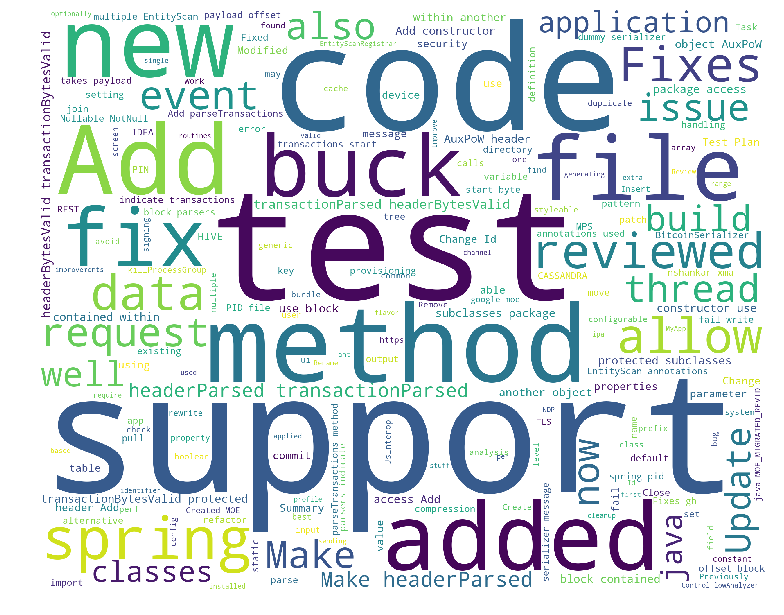

In [213]:
wordcloud_draw(train_em, 'white')

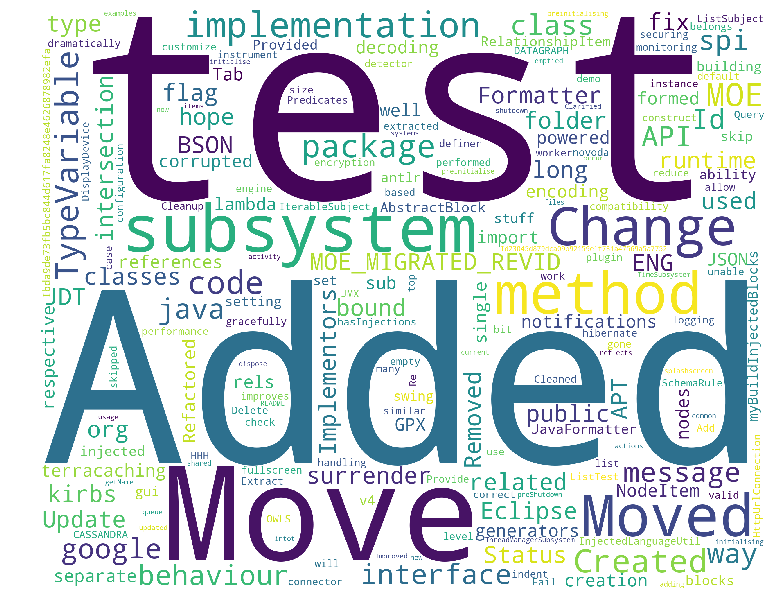

In [214]:
wordcloud_draw(train_mc, 'white')

### Preprocessing to remove stop words

In [215]:
stopwords_set = set(stopwords.words("english"))

messages = []
for index, row in train.iterrows():
    words_without_stopwords = [word for word in row if not word in stopwords_set]
    messages.append((words_without_stopwords, row["motivation_label"]))

In [216]:
messages

[(["iOS codesigning and provisioning file support\n\nSummary:\nThis implements support for generating bundles with valid provisioning profiles and code signatures for device installation, if we're building for a device flavor:\n\n1. Selecting the best mobile provisioning file based on the app identifier.\n2. Copying the file\n3. Generating an entitlements plist file for code signing.\n4. Running `/usr/bin/codesign` to sign the bundle.\n\nThe bundle can be manually made into an .ipa and installed by hand onto a device.\n\nTest Plan:\n1. `ant test`\n\n2. Make sure you have a generic development provisioning profile installed valid for your app's identifier as well as a code signing identity in your keychain as per Apple's developer instructions, then build an app with a device flavor.\n\n```\nbuck build //Apps/MyApp:MyApp#iphoneos-arm64\n```\n\nSee there's a `.mobileprovision` file in the output directory, as well as a `_CodeSignature` directory.\n",
   'EM'],
  'EM'),
 (['[GIRAPH-1022] 

In [220]:


# Extracting word features
def get_words_in_messages(messages):
    all = []
    for (words, label) in messages:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_messages(messages))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features



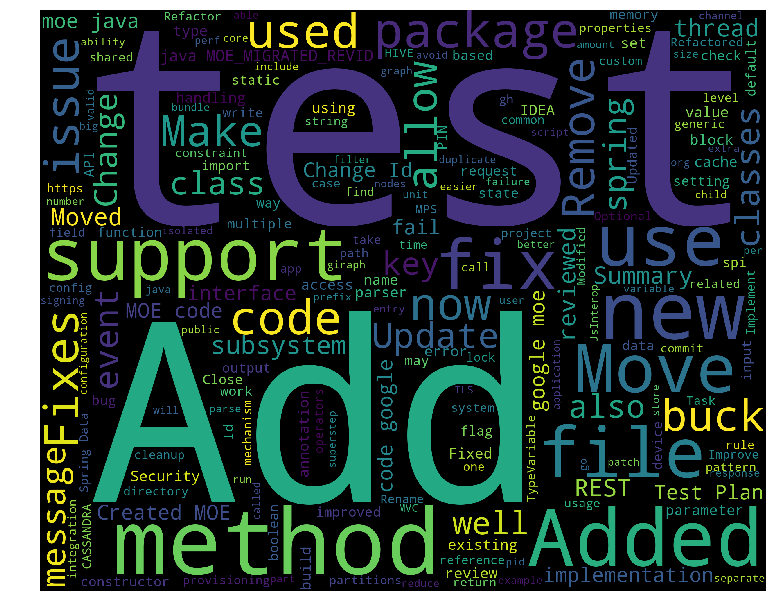

In [222]:
wordcloud_draw(w_features)

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train["message"])
X_train_counts.shape

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(213, 1527)

In [267]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train["motivation_label"])

In [269]:
predicted = clf.predict(test["message"])
# np.mean(predicted == test["motivation_label"])

ValueError: could not convert string to float: 'Enable creation of Mandatory Property Constraints\n\nThe constraints are not yet validated or enforced. This only supports\ncreating and dropping the constraints, as well as the storage of the\nconstraint metadata.\n'